# Keras -- MLPs on MNIST (Assignment)

In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation

In [0]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 25

In [0]:
model_relu = Sequential()
model_relu.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 64us/step - loss: 0.3668 - acc: 0.8908 - val_loss: 0.1670 - val_acc: 0.9503
Epoch 2/25
60000/60000 [==============================] - 3s 53us/step - loss: 0.1369 - acc: 0.9594 - val_loss: 0.1214 - val_acc: 0.9628
Epoch 3/25
60000/60000 [==============================] - 3s 53us/step - loss: 0.0950 - acc: 0.9715 - val_loss: 0.1039 - val_acc: 0.9684
Epoch 4/25
60000/60000 [==============================] - 3s 53us/step - loss: 0.0724 - acc: 0.9784 - val_loss: 0.0939 - val_acc: 0.9705
Epoch 5/25
60000/60000 [==============================] - 3s 50us/step - loss: 0.0565 - acc: 0.9827 - val_loss: 0.0910 - val_acc: 0.9717
Epoch 6/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0444 - acc: 0.9869 - val_loss: 0.0899 - val_acc: 0.9720
Epoch 7/25
60000/60000 [========

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])        

Test score: 0.10208157909803195
Test accuracy: 0.9792


In [0]:
vy = history.history['val_loss']

In [0]:
ty = history.history['loss']

In [0]:
x = list(range(1,nb_epoch+1))
print(x) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


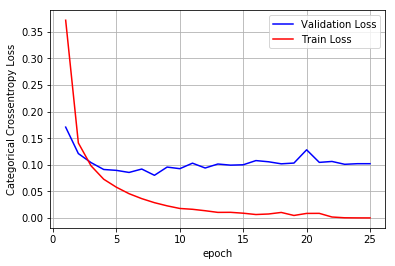

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax) 

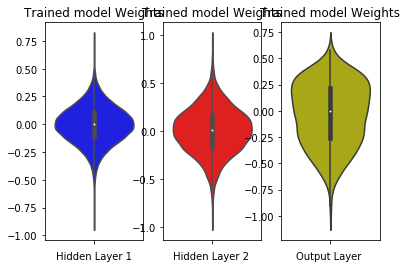

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **MLP(2 hidden layers) + BN + Dropout**

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_____

In [0]:
model_drop.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 62us/step - loss: 0.9036 - acc: 0.7210 - val_loss: 0.2837 - val_acc: 0.9183
Epoch 2/25
60000/60000 [==============================] - 3s 50us/step - loss: 0.4324 - acc: 0.8715 - val_loss: 0.2091 - val_acc: 0.9359
Epoch 3/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.3423 - acc: 0.8996 - val_loss: 0.1766 - val_acc: 0.9445
Epoch 4/25
60000/60000 [==============================] - 3s 50us/step - loss: 0.2951 - acc: 0.9150 - val_loss: 0.1499 - val_acc: 0.9549
Epoch 5/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.2670 - acc: 0.9223 - val_loss: 0.1384 - val_acc: 0.9580
Epoch 6/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.2392 - acc: 0.9300 - val_loss: 0.1245 - val_acc: 0.9626
Epoch 7/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.2219 - acc: 0.9354 - val_loss: 0.1188 - val_acc

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08200715694308747
Test accuracy: 0.9759


In [0]:
vy = history.history['val_loss']

In [0]:
ty = history.history['loss']

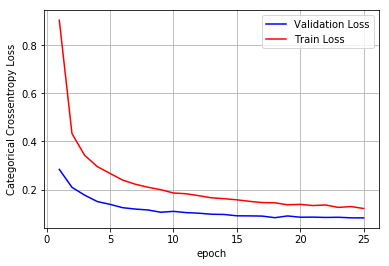

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax) 

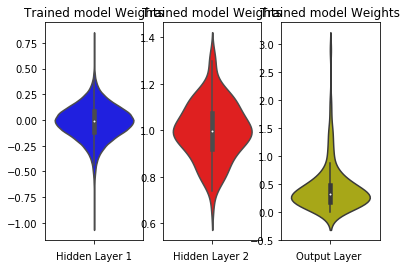

In [0]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3-Hidden layers

In [0]:
model_relu1 = Sequential()
model_relu1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )

model_relu1.add(Dense(output_dim, activation='softmax'))

model_relu1.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 476,490
Trainable params: 476,490
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model_relu1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 7s 110us/step - loss: 0.2377 - acc: 0.9276 - val_loss: 0.1129 - val_acc: 0.9646
Epoch 2/25
60000/60000 [==============================] - 6s 102us/step - loss: 0.0874 - acc: 0.9736 - val_loss: 0.0833 - val_acc: 0.9715
Epoch 3/25
60000/60000 [==============================] - 6s 104us/step - loss: 0.0563 - acc: 0.9823 - val_loss: 0.0872 - val_acc: 0.9737
Epoch 4/25
60000/60000 [==============================] - 6s 102us/step - loss: 0.0421 - acc: 0.9870 - val_loss: 0.0868 - val_acc: 0.9728
Epoch 5/25
60000/60000 [==============================] - 6s 102us/step - loss: 0.0305 - acc: 0.9898 - val_loss: 0.0905 - val_acc: 0.9731
Epoch 6/25
60000/60000 [==============================] - 6s 101us/step - loss: 0.0259 - acc: 0.9910 - val_loss: 0.0797 - val_acc: 0.9763
Epoch 7/25
60000/60000 [==============================] - 6s 101us/step - loss: 0.0203 - acc: 0.9932 - val_loss: 0.0878 - 

In [0]:
score = model_relu1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.12386338701506465
Test accuracy: 0.9781


In [0]:
vy = history1.history['val_loss']

In [0]:
ty = history1.history['loss']

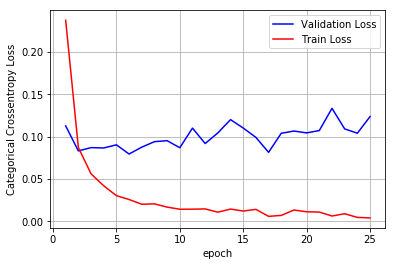

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

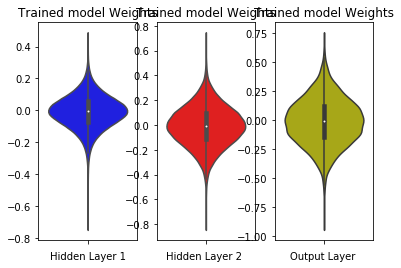

In [0]:
w_after = model_relu1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP(3 hidden layers) + BN + dropout

In [0]:
model_drop1 = Sequential()

model_drop1.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))

model_drop1.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))


model_drop1.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))

model_drop1.add(Dense(output_dim, activation='softmax'))


model_drop1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [0]:
model_drop1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model_drop1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 9s 153us/step - loss: 0.8088 - acc: 0.7493 - val_loss: 0.2061 - val_acc: 0.9373
Epoch 2/25
60000/60000 [==============================] - 8s 135us/step - loss: 0.3364 - acc: 0.9057 - val_loss: 0.1457 - val_acc: 0.9551
Epoch 3/25
60000/60000 [==============================] - 8s 135us/step - loss: 0.2527 - acc: 0.9294 - val_loss: 0.1207 - val_acc: 0.9643
Epoch 4/25
60000/60000 [==============================] - 8s 135us/step - loss: 0.2084 - acc: 0.9412 - val_loss: 0.1084 - val_acc: 0.9684
Epoch 5/25
60000/60000 [==============================] - 8s 135us/step - loss: 0.1813 - acc: 0.9496 - val_loss: 0.0997 - val_acc: 0.9698
Epoch 6/25
60000/60000 [==============================] - 8s 133us/step - loss: 0.1642 - acc: 0.9543 - val_loss: 0.0911 - val_acc: 0.9744
Epoch 7/25
60000/60000 [==============================] - 8s 132us/step - loss: 0.1490 - acc: 0.9583 - val_loss: 0.0862 - 

In [0]:
score = model_drop1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.06265506143792882
Test accuracy: 0.9834


In [0]:
vy1 = history.history['val_loss']

In [0]:
ty1 = history1.history['loss']

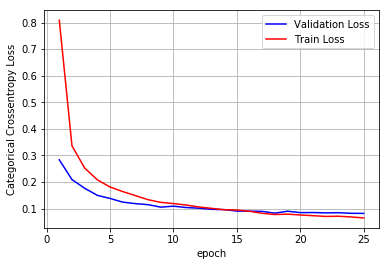

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy1, ty1, ax)

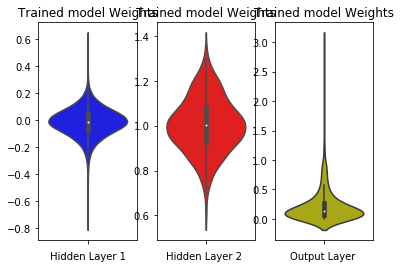

In [0]:
w_after = model_drop1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 5-Hidden layers

In [0]:
model_relu2 = Sequential()
model_relu2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu2.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )
model_relu2.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu2.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_relu2.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )

model_relu2.add(Dense(output_dim, activation='softmax'))

model_relu2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
________________________________________________

In [0]:
model_relu2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model_relu2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 9s 142us/step - loss: 0.2514 - acc: 0.9246 - val_loss: 0.1433 - val_acc: 0.9533
Epoch 2/25
60000/60000 [==============================] - 7s 125us/step - loss: 0.0987 - acc: 0.9686 - val_loss: 0.1112 - val_acc: 0.9664
Epoch 3/25
60000/60000 [==============================] - 8s 130us/step - loss: 0.0615 - acc: 0.9803 - val_loss: 0.0837 - val_acc: 0.9742
Epoch 4/25
60000/60000 [==============================] - 8s 127us/step - loss: 0.0471 - acc: 0.9850 - val_loss: 0.0819 - val_acc: 0.9760
Epoch 5/25
60000/60000 [==============================] - 8s 128us/step - loss: 0.0400 - acc: 0.9871 - val_loss: 0.0769 - val_acc: 0.9765
Epoch 6/25
60000/60000 [==============================] - 8s 127us/step - loss: 0.0313 - acc: 0.9898 - val_loss: 0.1003 - val_acc: 0.9736
Epoch 7/25
60000/60000 [==============================] - 8s 125us/step - loss: 0.0279 - acc: 0.9905 - val_loss: 0.0950 - 

In [0]:
score = model_relu2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08651298187101275
Test accuracy: 0.9822


In [0]:
vy1 = history1.history['val_loss']

In [0]:
ty1 = history1.history['loss']

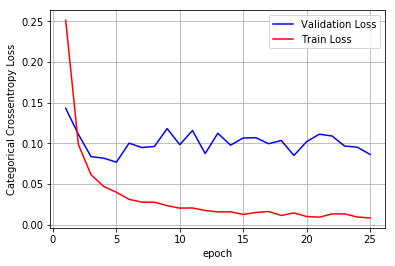

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy1, ty1, ax)

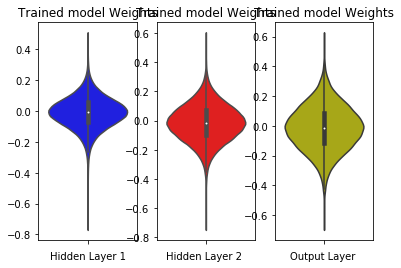

In [0]:
w_after = model_relu2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP(5 hidden layers) + BN 

In [0]:
model_bn = Sequential()
model_bn.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_bn.add(BatchNormalization())
model_bn.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )
model_bn.add(BatchNormalization())
model_bn.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_bn.add(BatchNormalization())
model_bn.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_bn.add(BatchNormalization())
model_bn.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_bn.add(BatchNormalization())
model_bn.add(Dense(output_dim, activation='softmax'))

model_bn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
dense_34 (Dense)             (None, 64)               

In [0]:
model_bn.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model_bn.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 197us/step - loss: 0.2801 - acc: 0.9225 - val_loss: 0.1196 - val_acc: 0.9638
Epoch 2/25
60000/60000 [==============================] - 10s 161us/step - loss: 0.0904 - acc: 0.9734 - val_loss: 0.0979 - val_acc: 0.9699
Epoch 3/25
60000/60000 [==============================] - 10s 161us/step - loss: 0.0626 - acc: 0.9808 - val_loss: 0.0918 - val_acc: 0.9707
Epoch 4/25
60000/60000 [==============================] - 10s 163us/step - loss: 0.0478 - acc: 0.9848 - val_loss: 0.0804 - val_acc: 0.9753
Epoch 5/25
60000/60000 [==============================] - 10s 163us/step - loss: 0.0368 - acc: 0.9880 - val_loss: 0.0943 - val_acc: 0.9710
Epoch 6/25
60000/60000 [==============================] - 10s 163us/step - loss: 0.0338 - acc: 0.9887 - val_loss: 0.0850 - val_acc: 0.9751
Epoch 7/25
60000/60000 [==============================] - 10s 162us/step - loss: 0.0335 - acc: 0.9888 - val_loss: 0.

In [0]:
score = model_bn.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09201400800938718
Test accuracy: 0.98


In [0]:
vy2 = history1.history['val_loss']

In [0]:
ty2 = history1.history['loss']

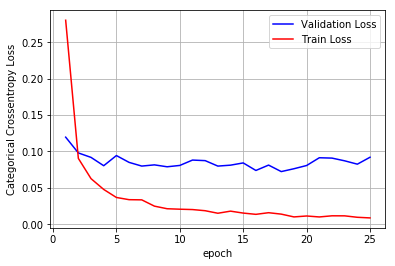

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy2, ty2, ax)

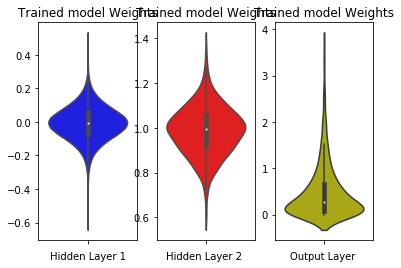

In [0]:
w_after = model_bn.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP(5 hidden layers) + BN + Dropout

In [0]:
model_bndr = Sequential()
model_bndr.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_bndr.add(BatchNormalization())
model_bndr.add(Dropout(0.5))
model_bndr.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )
model_bndr.add(BatchNormalization())
model_bndr.add(Dropout(0.5))
model_bndr.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_bndr.add(BatchNormalization())
model_bndr.add(Dropout(0.5))
model_bndr.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_bndr.add(BatchNormalization())
model_bndr.add(Dropout(0.5))
model_bndr.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_bndr.add(BatchNormalization())
model_bndr.add(Dropout(0.5))
model_bndr.add(Dense(output_dim, activation='softmax'))

model_bndr.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)             

In [0]:
model_bndr.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model_bndr.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 13s 213us/step - loss: 1.6167 - acc: 0.4683 - val_loss: 0.4645 - val_acc: 0.8766
Epoch 2/25
60000/60000 [==============================] - 10s 171us/step - loss: 0.6998 - acc: 0.7867 - val_loss: 0.2297 - val_acc: 0.9359
Epoch 3/25
60000/60000 [==============================] - 10s 175us/step - loss: 0.4649 - acc: 0.8744 - val_loss: 0.1731 - val_acc: 0.9501
Epoch 4/25
60000/60000 [==============================] - 10s 173us/step - loss: 0.3668 - acc: 0.9063 - val_loss: 0.1454 - val_acc: 0.9618
Epoch 5/25
60000/60000 [==============================] - 10s 172us/step - loss: 0.3119 - acc: 0.9233 - val_loss: 0.1381 - val_acc: 0.9651
Epoch 6/25
60000/60000 [==============================] - 10s 173us/step - loss: 0.2779 - acc: 0.9335 - val_loss: 0.1304 - val_acc: 0.9682
Epoch 7/25
60000/60000 [==============================] - 10s 173us/step - loss: 0.2532 - acc: 0.9407 - val_loss: 0.

In [0]:
score = model_bndr.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08151232925342629
Test accuracy: 0.981


In [0]:
vy3 = history2.history['val_loss']

In [0]:
ty3 = history2.history['loss']

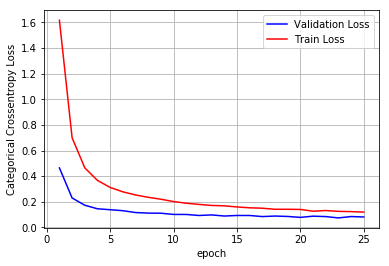

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy3, ty3, ax)

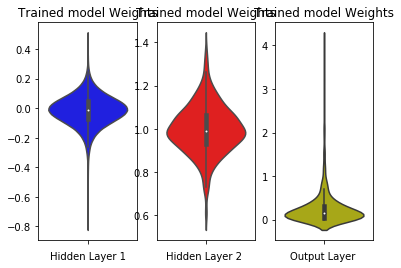

In [0]:
w_after = model_bndr.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [" Number of hidden layers", "Batch-Normalization", "Dropout", "Score", "Accuracy"]

x.add_row(["2", "no", "no", 0.102, 0.9792 ])
x.add_row(["2", "yes", "yes", 0.082, 0.9759])     
x.add_row(["3", "no", "no", 0.1238, 0.9781])   
x.add_row(["3", "yes", "yes", 0.062, 0.9834]) 
x.add_row(["5", "no", "no", 0.0865, 0.9822])    
x.add_row(["5", "yes", "no", 0.092, 0.98])  
x.add_row(["5", "yes", "yes", 0.0815, 0.981 ])     
print(x)

+--------------------------+---------------------+---------+--------+----------+
|  Number of hidden layers | Batch-Normalization | Dropout | Score  | Accuracy |
+--------------------------+---------------------+---------+--------+----------+
|            2             |          no         |    no   | 0.102  |  0.9792  |
|            2             |         yes         |   yes   | 0.082  |  0.9759  |
|            3             |          no         |    no   | 0.1238 |  0.9781  |
|            3             |         yes         |   yes   | 0.062  |  0.9834  |
|            5             |          no         |    no   | 0.0865 |  0.9822  |
|            5             |         yes         |    no   | 0.092  |   0.98   |
|            5             |         yes         |   yes   | 0.0815 |  0.981   |
+--------------------------+---------------------+---------+--------+----------+


# OBSERVATIONS:


1. 3 hidden layers with batch normalization and dropout gave the best test score and accuracy
2. Batch normalization and droupout improves the test score



# Suggestions Implemented

## 3 Hidden layers

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import RandomUniform
model_drop1 = Sequential()

model_drop1.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomUniform(minval=-0.044, maxval=0.044, seed=None)))
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.3))

model_drop1.add(Dense(64, activation='sigmoid', kernel_initializer=RandomUniform(minval=-0.125, maxval=0.125, seed=None))) 
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.3))


model_drop1.add(Dense(32, activation='sigmoid', kernel_initializer=RandomUniform(minval=-0.176, maxval=0.176, seed=None)) )
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.3))

model_drop1.add(Dense(output_dim, activation='softmax'))


model_drop1.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
____

In [0]:
model_drop1.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model_drop1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 96us/step - loss: 0.4730 - acc: 0.8602 - val_loss: 0.2498 - val_acc: 0.9287
Epoch 2/25
60000/60000 [==============================] - 4s 73us/step - loss: 0.3607 - acc: 0.8951 - val_loss: 0.2293 - val_acc: 0.9329
Epoch 3/25
60000/60000 [==============================] - 4s 74us/step - loss: 0.3294 - acc: 0.9032 - val_loss: 0.2118 - val_acc: 0.9382
Epoch 4/25
60000/60000 [==============================] - 4s 73us/step - loss: 0.3105 - acc: 0.9089 - val_loss: 0.2020 - val_acc: 0.9394
Epoch 5/25
60000/60000 [==============================] - 4s 73us/step - loss: 0.2982 - acc: 0.9133 - val_loss: 0.1886 - val_acc: 0.9439
Epoch 6/25
60000/60000 [==============================] - 4s 72us/step - loss: 0.2846 - acc: 0.9166 - val_loss: 0.1850 - val_acc: 0.9436
Epoch 7/25
60000/60000 [========

In [0]:
score = model_drop1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.11875482857581228
Test accuracy: 0.9633


In [0]:
vy3 = history2.history['val_loss']

In [0]:
ty3 = history2.history['loss']

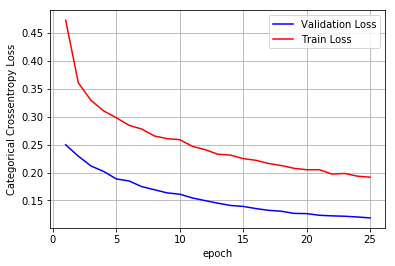

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy3, ty3, ax)

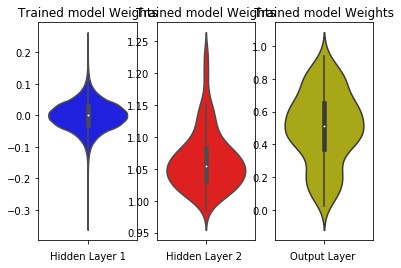

In [0]:
w_after = model_drop1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3 hidden layers + same neurons in each layer

In [0]:
model_drop2 = Sequential()

model_drop2.add(Dense(64, activation='sigmoid',input_shape=(input_dim,), kernel_initializer=RandomUniform(minval=-0.125, maxval=0.125, seed=None))) 
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.3))

model_drop2.add(Dense(64, activation='sigmoid', kernel_initializer=RandomUniform(minval=-0.125, maxval=0.125, seed=None))) 
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.3))

model_drop2.add(Dense(64, activation='sigmoid', kernel_initializer=RandomUniform(minval=-0.125, maxval=0.125, seed=None))) 
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.3))
model_drop2.add(Dense(output_dim, activation='softmax'))


model_drop2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [0]:
model_drop2.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model_drop2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 58us/step - loss: 0.5201 - acc: 0.8410 - val_loss: 0.2799 - val_acc: 0.9184
Epoch 2/25
60000/60000 [==============================] - 3s 42us/step - loss: 0.4042 - acc: 0.8796 - val_loss: 0.2646 - val_acc: 0.9207
Epoch 3/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.3751 - acc: 0.8888 - val_loss: 0.2519 - val_acc: 0.9238
Epoch 4/25
60000/60000 [==============================] - 3s 42us/step - loss: 0.3533 - acc: 0.8961 - val_loss: 0.2431 - val_acc: 0.9283
Epoch 5/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.3420 - acc: 0.8984 - val_loss: 0.2330 - val_acc: 0.9308
Epoch 6/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.3288 - acc: 0.9023 - val_loss: 0.2264 - val_acc: 0.9333
Epoch 7/25
60000/60000 [==============================] - 3s 42us/step - loss: 0.3222 - acc: 0.9049 - val_loss: 0.2190 - val_acc

In [0]:
score = model_drop2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.16074659808650613
Test accuracy: 0.9514


In [0]:
vy3 = history2.history['val_loss']

In [0]:
ty3 = history2.history['loss']

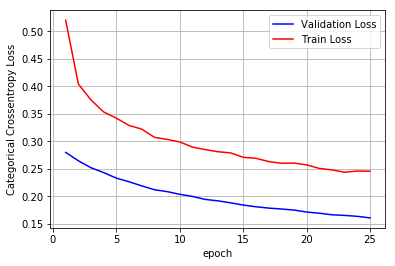

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy3, ty3, ax)

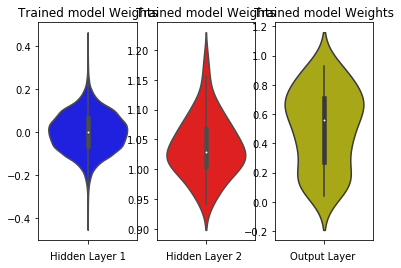

In [0]:
w_after = model_drop2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3 hidden layer + BN + Dropout 

In [0]:
model_drop2 = Sequential()

model_drop2.add(Dense(64, activation='sigmoid',input_shape=(input_dim,), kernel_initializer=RandomUniform(minval=-0.125, maxval=0.125, seed=None))) 
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.5))

model_drop2.add(Dense(64, activation='sigmoid', kernel_initializer=RandomUniform(minval=-0.125, maxval=0.125, seed=None))) 
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.5))

model_drop2.add(Dense(64, activation='sigmoid', kernel_initializer=RandomUniform(minval=-0.125, maxval=0.125, seed=None))) 
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.5))
model_drop2.add(Dense(output_dim, activation='softmax'))


model_drop2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_16 (Batc (None, 64)                256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_17 (Batc (None, 64)                256       
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)               

In [0]:
model_drop2.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model_drop2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 65us/step - loss: 0.7797 - acc: 0.7529 - val_loss: 0.3211 - val_acc: 0.9042
Epoch 2/25
60000/60000 [==============================] - 2s 41us/step - loss: 0.5795 - acc: 0.8233 - val_loss: 0.2992 - val_acc: 0.9101
Epoch 3/25
60000/60000 [==============================] - 3s 42us/step - loss: 0.5361 - acc: 0.8396 - val_loss: 0.2878 - val_acc: 0.9130
Epoch 4/25
60000/60000 [==============================] - 3s 42us/step - loss: 0.5148 - acc: 0.8458 - val_loss: 0.2815 - val_acc: 0.9158
Epoch 5/25
60000/60000 [==============================] - 3s 42us/step - loss: 0.4953 - acc: 0.8549 - val_loss: 0.2742 - val_acc: 0.9185
Epoch 6/25
60000/60000 [==============================] - 2s 42us/step - loss: 0.4813 - acc: 0.8574 - val_loss: 0.2709 - val_acc: 0.9178
Epoch 7/25
60000/60000 [==============================] - 2s 42us/step - loss: 0.4652 - acc: 0.8634 - val_loss: 0.2670 - val_acc

In [0]:
score = model_drop2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.22751531588360668
Test accuracy: 0.9308


In [0]:
vy3 = history2.history['val_loss']

In [0]:
ty3 = history2.history['loss']

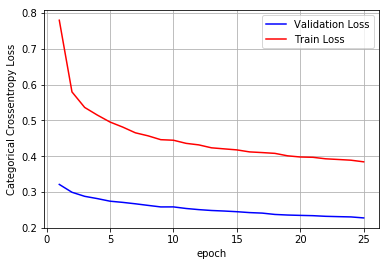

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy3, ty3, ax)

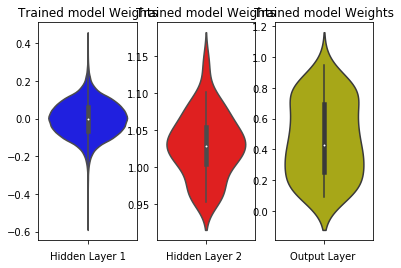

In [0]:
w_after = model_drop2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 4 hidden layer + tanh activation + BN

In [0]:
model_batch = Sequential()

model_batch.add(Dense(512, activation='tanh', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.055, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(64, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(64, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
dense_27 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_20 (Batc (None, 128)               512       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_21 (Batc (None, 64)                256       
_________________________________________________________________
dense_29 (Dense)             (None, 64)               

In [0]:
model_batch.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 11s 179us/step - loss: 0.2564 - acc: 0.9257 - val_loss: 0.1591 - val_acc: 0.9537
Epoch 2/25
60000/60000 [==============================] - 9s 145us/step - loss: 0.1225 - acc: 0.9634 - val_loss: 0.1325 - val_acc: 0.9588
Epoch 3/25
60000/60000 [==============================] - 9s 145us/step - loss: 0.0836 - acc: 0.9741 - val_loss: 0.1045 - val_acc: 0.9697
Epoch 4/25
60000/60000 [==============================] - 9s 146us/step - loss: 0.0610 - acc: 0.9804 - val_loss: 0.0850 - val_acc: 0.9737
Epoch 5/25
60000/60000 [==============================] - 9s 146us/step - loss: 0.0445 - acc: 0.9863 - val_loss: 0.0887 - val_acc: 0.9750
Epoch 6/25
60000/60000 [==============================] - 9s 147us/step - loss: 0.0314 - acc: 0.9904 - val_loss: 0.0921 - val_acc: 0.9756
Epoch 7/25
60000/60000 [==============================] - 9s 146us/step - loss: 0.0261 - acc: 0.9916 - val_loss: 0.0771 -

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.10579232613174326
Test accuracy: 0.9796


In [0]:
vy3 = history2.history['val_loss']

In [0]:
ty3 = history2.history['loss']

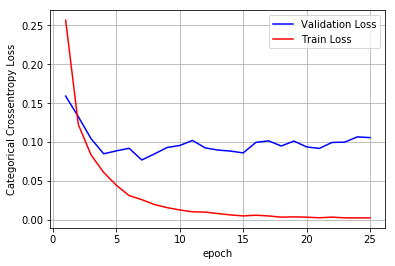

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy3, ty3, ax)

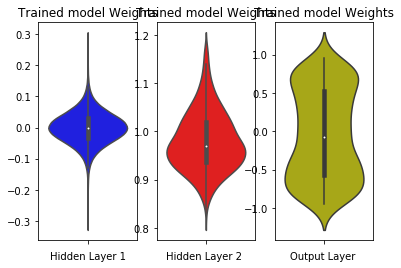

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 4 hidden layers + tanh + BN + dropout

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import RandomUniform
model_batch = Sequential()

model_batch.add(Dense(512, activation='tanh', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dropout(0.4))

model_batch.add(Dense(128, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.055, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dropout(0.4))


model_batch.add(Dense(64, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dropout(0.4))


model_batch.add(Dense(64, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dropout(0.4))


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

In [0]:
model_batch.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 13s 218us/step - loss: 0.7125 - acc: 0.7808 - val_loss: 0.2627 - val_acc: 0.9265
Epoch 2/25
60000/60000 [==============================] - 11s 181us/step - loss: 0.3950 - acc: 0.8889 - val_loss: 0.2050 - val_acc: 0.9407
Epoch 3/25
60000/60000 [==============================] - 11s 180us/step - loss: 0.2994 - acc: 0.9163 - val_loss: 0.1755 - val_acc: 0.9522
Epoch 4/25
60000/60000 [==============================] - 11s 183us/step - loss: 0.2432 - acc: 0.9330 - val_loss: 0.1425 - val_acc: 0.9615
Epoch 5/25
60000/60000 [==============================] - 11s 180us/step - loss: 0.2104 - acc: 0.9429 - val_loss: 0.1225 - val_acc: 0.9677
Epoch 6/25
60000/60000 [==============================] - 11s 190us/step - loss: 0.1859 - acc: 0.9492 - val_loss: 0.1152 - val_acc: 0.9699
Epoch 7/25
60000/60000 [==============================] - 11s 178us/step - loss: 0.1709 - acc: 0.9533 - val_loss: 0.

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.07489879862619564
Test accuracy: 0.9827


In [0]:
vy3 = history2.history['val_loss']

In [0]:
ty3 = history2.history['loss']

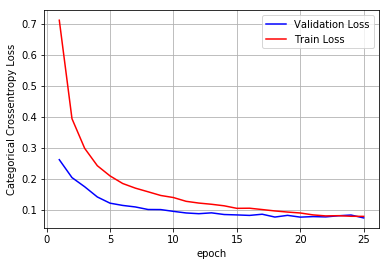

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy3, ty3, ax)

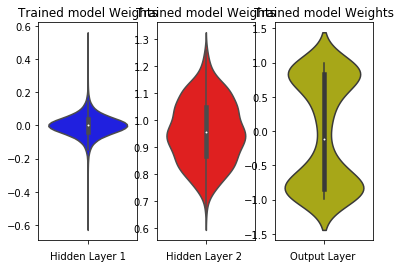

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 4 hidden layer + tanh 

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import RandomUniform
model_batch2 = Sequential()

model_batch2.add(Dense(512, activation='tanh', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))

model_batch2.add(Dense(128, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.055, seed=None)) )

model_batch2.add(Dense(64, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.102, seed=None)) )

model_batch2.add(Dense(64, activation='tanh', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )

model_batch2.add(Dense(output_dim, activation='softmax'))


model_batch2.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 480,650
Trainable params: 480,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_batch2.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 130us/step - loss: 0.3139 - acc: 0.9086 - val_loss: 0.1640 - val_acc: 0.9515
Epoch 2/25
60000/60000 [==============================] - 8s 126us/step - loss: 0.1338 - acc: 0.9598 - val_loss: 0.1090 - val_acc: 0.9668
Epoch 3/25
60000/60000 [==============================] - 8s 128us/step - loss: 0.0890 - acc: 0.9732 - val_loss: 0.0927 - val_acc: 0.9702
Epoch 4/25
60000/60000 [==============================] - 8s 127us/step - loss: 0.0679 - acc: 0.9787 - val_loss: 0.0966 - val_acc: 0.9700
Epoch 5/25
60000/60000 [==============================] - 7s 125us/step - loss: 0.0525 - acc: 0.9839 - val_loss: 0.0887 - val_acc: 0.9721
Epoch 6/25
60000/60000 [==============================] - 7s 125us/step - loss: 0.0401 - acc: 0.9873 - val_loss: 0.1118 - val_acc: 0.9640
Epoch 7/25
60000/60000 [==

In [0]:
score = model_batch2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.08024764383168685
Test accuracy: 0.9831


In [0]:
vy = history.history['val_loss']

In [0]:
ty = history.history['loss']

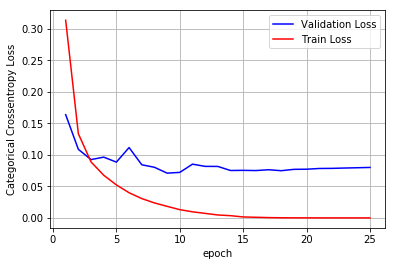

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

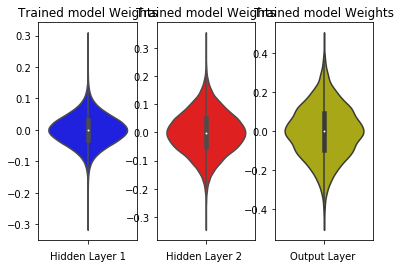

In [0]:
w_after = model_batch2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 4 hidden layers + Relu + BN + dropout

In [0]:
model_batch5 = Sequential()
model_batch5.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_batch5.add(BatchNormalization())
model_batch5.add(Dropout(0.5))

model_batch5.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch5.add(BatchNormalization())
model_batch5.add(Dropout(0.5))


model_batch5.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_batch5.add(BatchNormalization())
model_batch5.add(Dropout(0.5))


model_batch5.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_batch5.add(BatchNormalization())
model_batch5.add(Dropout(0.5))

model_batch5.add(Dense(output_dim, activation='softmax'))
model_batch5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)               

In [0]:
model_batch5.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 202us/step - loss: 1.2505 - acc: 0.6022 - val_loss: 0.2598 - val_acc: 0.9233
Epoch 2/25
60000/60000 [==============================] - 9s 158us/step - loss: 0.4886 - acc: 0.8600 - val_loss: 0.1836 - val_acc: 0.9461
Epoch 3/25
60000/60000 [==============================] - 10s 160us/step - loss: 0.3525 - acc: 0.9030 - val_loss: 0.1456 - val_acc: 0.9595
Epoch 4/25
60000/60000 [==============================] - 10s 159us/step - loss: 0.2836 - acc: 0.9242 - val_loss: 0.1275 - val_acc: 0.9648
Epoch 5/25
60000/60000 [==============================] - 10s 159us/step - loss: 0.2408 - acc: 0.9365 - val_loss: 0.1156 - val_acc: 0.9690
Epoch 6/25
60000/60000 [==============================] - 10s 162us/step - loss: 0.2208 - acc: 0.9420 - val_loss: 0.1129 - val_acc: 0.9696
Epoch 7/25
60000/60000 [==============================] - 10s 163us/step - loss: 0.1956 - acc: 0.9495 - val_loss: 0.1

In [0]:
score = model_batch5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.07331271594372811
Test accuracy: 0.9821


In [0]:
vy = history.history['val_loss']

In [0]:
ty = history.history['loss']

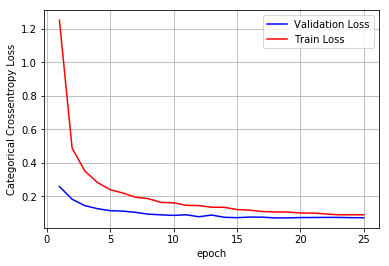

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

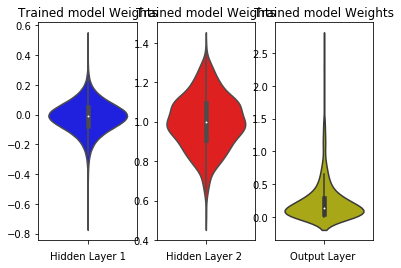

In [0]:
w_after = model_batch5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 7 hidden layers

In [0]:
model_batch6 = Sequential()
model_batch6.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_batch6.add(BatchNormalization())

model_batch6.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch6.add(BatchNormalization())

model_batch6.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch6.add(BatchNormalization())

model_batch6.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch6.add(BatchNormalization())

model_batch6.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch6.add(BatchNormalization())

model_batch6.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch6.add(BatchNormalization())

model_batch6.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_batch6.add(BatchNormalization())

model_batch6.add(Dense(output_dim, activation='softmax'))
model_batch6.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

In [0]:
model_batch6.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch6.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 10s 162us/step - loss: 0.0317 - acc: 0.9900 - val_loss: 0.1141 - val_acc: 0.9730
Epoch 2/25
60000/60000 [==============================] - 7s 116us/step - loss: 0.0250 - acc: 0.9915 - val_loss: 0.1015 - val_acc: 0.9771
Epoch 3/25
60000/60000 [==============================] - 7s 115us/step - loss: 0.0234 - acc: 0.9926 - val_loss: 0.0958 - val_acc: 0.9758
Epoch 4/25
60000/60000 [==============================] - 7s 115us/step - loss: 0.0216 - acc: 0.9934 - val_loss: 0.0964 - val_acc: 0.9764
Epoch 5/25
60000/60000 [==============================] - 7s 120us/step - loss: 0.0208 - acc: 0.9930 - val_loss: 0.1033 - val_acc: 0.9757
Epoch 6/25
60000/60000 [==============================] - 7s 116us/step - loss: 0.0239 - acc: 0.9919 - val_loss: 0.1045 - val_acc: 0.9748
Epoch 7/25
60000/60000 [==============================] - 7s 118us/step - loss: 0.0156 - acc: 0.9946 - val_loss: 0.0885 -

In [0]:
score = model_batch6.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.09280263519890432
Test accuracy: 0.9793


In [0]:
vy = history.history['val_loss']

In [0]:
ty = history.history['loss']

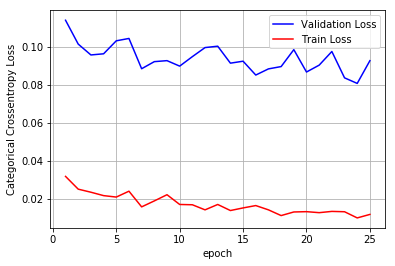

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

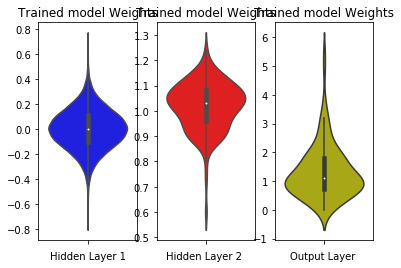

In [0]:
w_after = model_batch6.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 7 hidden layer +  dropout + relu + adam

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import RandomUniform
model_batch7 = Sequential()
model_batch7.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_batch7.add(Dropout(0.5))

model_batch7.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )
model_batch7.add(Dropout(0.5))

model_batch7.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )
model_batch7.add(Dropout(0.5))

model_batch7.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch7.add(Dropout(0.5))

model_batch7.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch7.add(Dropout(0.5))

model_batch7.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )
model_batch7.add(Dropout(0.5))

model_batch7.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_batch7.add(Dropout(0.5))

model_batch7.add(Dense(output_dim, activation='softmax'))
model_batch7.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)              

In [0]:
model_batch7.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model_batch7.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 196us/step - loss: 3.2158 - acc: 0.1161 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 2/25
60000/60000 [==============================] - 10s 173us/step - loss: 2.2730 - acc: 0.1590 - val_loss: 2.2084 - val_acc: 0.1979
Epoch 3/25
60000/60000 [==============================] - 10s 173us/step - loss: 2.0795 - acc: 0.2323 - val_loss: 2.0476 - val_acc: 0.2125
Epoch 4/25
60000/60000 [==============================] - 10s 175us/step - loss: 1.8639 - acc: 0.2883 - val_loss: 1.8916 - val_acc: 0.2146
Epoch 5/25
60000/60000 [==============================] - 10s 174us/step - loss: 1.7017 - acc: 0.3296 - val_loss: 1.7886 - val_acc: 0.2250
Epoch 6/25
60000/60000 [==============================] - 10s 173us/step - loss: 1.5680 - acc: 0.3790 - val_loss: 1.5740 - val_acc: 0.3450
Epoch 7/25
60000/60000 [==============================] - 10s 173us/step - loss: 1.4331 - acc: 0.4408 - val_loss: 1.

In [0]:
score = model_batch7.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.5772986656665802
Test accuracy: 0.7643


In [0]:
vy = history1.history['val_loss']

In [0]:
ty = history1.history['loss']

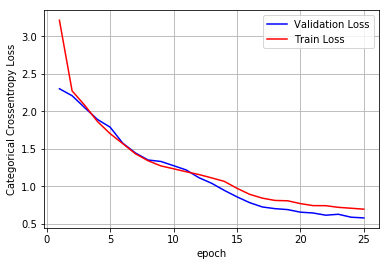

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')
plt_dynamic(x, vy, ty, ax)

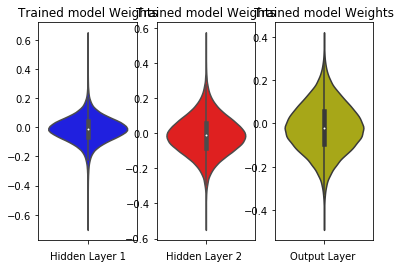

In [0]:
w_after = model_batch7.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [32]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [" Number of hidden layers","activation", "Batch-Normalization", "Dropout","optimizer", "Score", "Accuracy"]

x.add_row(["3", "sigmoid","yes", "yes(dropout = 0.3)","adagrad", 0.118, 0.9633 ])
x.add_row(["3", "sigmoid","yes", "yes","adagrad", 0.1607, 0.9514 ])  # same no. of neurons in each hidden layer
x.add_row(["3", "sigmoid","yes", "yes(dropout = 0.5)","adagrad", 0.227, 0.9308 ])
x.add_row(["4", "tanh","yes", "no","addelta", 0.105, 0.9796 ])
x.add_row(["4", "tanh","yes", "yes","addelta", 0.74, 0.9827 ])
x.add_row(["4", "tanh","no", "no","addelta", 0.08, 0.9831 ])
x.add_row(["4", "relu","yes", "yes","adam", 0.733, 0.9821])
x.add_row(["7", "relu","yes", "no","adam", 0.92, 0.9793 ])
x.add_row(["7", "relu","no", "yes","adam", 0.5772, 0.7643 ]) # with batch normalization, score=0.0911 and accuracy = 0.9818

     
print(x)

+--------------------------+------------+---------------------+--------------------+-----------+--------+----------+
|  Number of hidden layers | activation | Batch-Normalization |      Dropout       | optimizer | Score  | Accuracy |
+--------------------------+------------+---------------------+--------------------+-----------+--------+----------+
|            3             |  sigmoid   |         yes         | yes(dropout = 0.3) |  adagrad  | 0.118  |  0.9633  |
|            3             |  sigmoid   |         yes         |        yes         |  adagrad  | 0.1607 |  0.9514  |
|            3             |  sigmoid   |         yes         | yes(dropout = 0.5) |  adagrad  | 0.227  |  0.9308  |
|            4             |    tanh    |         yes         |         no         |  addelta  | 0.105  |  0.9796  |
|            4             |    tanh    |         yes         |        yes         |  addelta  |  0.74  |  0.9827  |
|            4             |    tanh    |          no         | 

# CONCLUSION : 

1. Used different activations function and optimizers
2. Experimented with and without dropout and batch normalizations
3. Used He-initialization for relu activation, glorot for tanh 
4. Batch normalization has proved to be very good for higher accuracy
5. Increasing droupout value from 0.3 to 0.5 reduced the accuracy for a 3 hidden layer model
